# Multi-class Classification: Digits Dataset.

***Stephen Sani***

>***To train a classification model that predict the digit hand-written in an image.***

Loading required packages

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
import skops.io as sio

from ml_util import SplitData, ScaleFeatures, train_accuracy, cv_accuracy

The following tasks will be completed:
1. Read the data
2. Split the data into training and test sets (Stratified split)
3. Scale the data
4. Train and validate several classification models and select the most promising
5. Tune, test and evaluate most prommising model
6. Predict some sample data.

## Read the digits dataset

Reading the digits dataset

In [2]:
mnist_digits = load_digits()

The data set is a dictionary of key-value pairs. the values comprises data and metadata componens that can be accessed through their associated keys. The keys are shown.

In [3]:
mnist_digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

Reading the digits data and target components. The target is a multi-class of 0 - 9 

In [4]:
digits_x = mnist_digits['data'][10:, :]
digits_y = mnist_digits['target'][10:]

## Data Preparation

Instantiating data splitting task in pipeline for execution

In [5]:
# Define a split data pipeline
split_data = Pipeline([
    ('split_data', SplitData()),
])

The pipeline is executed to obtain training and test sets

In [6]:
# Execute the pipeline
train_x, test_x, train_y, test_y = split_data.fit_transform(X=digits_x, y=digits_y)

## Model Selection

Training and evaluating several classification models to choose the most promising one

#### 1. Stochastic Gradient Descent Classifier

In [7]:
# SGD classifier
sgd_clf = Pipeline([
    ('scale_features', ScaleFeatures()),
    ('sgd_clf', SGDClassifier(max_iter=4000, random_state=42)),
])
sgd_clf.fit(X=train_x, y=train_y)
sio.dump(sgd_clf, './resources/models/sgd_clf.joblib')
train_y_pred = sgd_clf.predict(X=train_x)

# Compute training and test errors
sgd_clf_trac = train_accuracy(train_y, train_y_pred)
sgd_clf_cvac = cv_accuracy(sgd_clf, train_x, train_y)


#### 2. One-vs-One Multi-class Classifier

In [8]:
# One-vs-one multi-class classifier with SGDClassifiers
ovo_clf = Pipeline([
    ('scale_features', ScaleFeatures()),
    ('ovo_clf', OneVsOneClassifier(SGDClassifier(max_iter=4000, random_state=42))),
])
ovo_clf.fit(X=train_x, y=train_y)
sio.dump(ovo_clf, './resources/models/ovo_clf.joblib') 
train_y_pred = ovo_clf.predict(X=train_x)

# Compute training and test errors
ovo_clf_trac = train_accuracy(train_y, train_y_pred)
ovo_clf_cvac = cv_accuracy(ovo_clf, train_x, train_y)


#### 3. One-vs-Rest Multi-class Classifier

In [9]:
# One-vs-rest multi-class classifier with SGDClassifiers
ovr_clf = Pipeline([
    ('scale_features', ScaleFeatures()),
    ('ovr_clf', OneVsRestClassifier(SGDClassifier(max_iter=4000, random_state=42))),
])
ovr_clf.fit(X=train_x, y=train_y)
sio.dump(ovr_clf, './resources/models/ovr_clf.joblib')
train_y_pred = ovr_clf.predict(X=train_x)

# Compute training and test errors
ovr_clf_trac = train_accuracy(train_y, train_y_pred)
ovr_clf_cvac = cv_accuracy(ovr_clf, train_x, train_y)


#### 4. Logistic regression classifier

In [10]:
# Logistic regression classifier 
logistic_clf = Pipeline([
    ('scale_features', ScaleFeatures()),
    ('losistic_clf', LogisticRegression(max_iter=4000, random_state=42)),
])
logistic_clf.fit(X=train_x, y=train_y)
sio.dump(logistic_clf, './resources/models/logistic_clf.joblib') 
train_y_pred = logistic_clf.predict(X=train_x)

# Compute training and test errors
logistic_clf_trac = train_accuracy(train_y, train_y_pred)
logistic_clf_cvac = cv_accuracy(logistic_clf, train_x, train_y)


#### 5. Softmax Logistic Regression Classifier

In [11]:
# Softmax Logistic regression classifier
softmax_clf = Pipeline([
    ('scale_features', ScaleFeatures()),
    ('softmax_clf', LogisticRegression(random_state=42, max_iter=4000, multi_class="multinomial", solver="lbfgs", C=3)),
])
softmax_clf.fit(X=train_x, y=train_y)
sio.dump(softmax_clf, './resources/models/softmax_clf.joblib')
train_y_pred = softmax_clf.predict(X=train_x)

# Compute training and test errors
softmax_clf_trac = train_accuracy(train_y, train_y_pred)
softmax_clf_cvac = cv_accuracy(logistic_clf, train_x, train_y)


#### 6. Decision Tree Classifier

In [12]:
# Decision tree classifier
tree_clf = Pipeline([
    ('tree_clf', DecisionTreeClassifier(random_state=42)),
])
tree_clf.fit(X=train_x, y=train_y)
sio.dump(tree_clf, './resources/models/tree_clf.joblib') 
train_y_pred = tree_clf.predict(X=train_x)

# Compute training and test errors
tree_clf_trac = train_accuracy(train_y, train_y_pred)
tree_clf_cvac = cv_accuracy(tree_clf, train_x, train_y)


#### 7. Random Forest Classifier

In [13]:
# Random forest classifier
forest_clf = Pipeline([
    ('forest_clf', RandomForestClassifier(random_state=42)),
])
forest_clf.fit(X=train_x, y=train_y)
sio.dump(forest_clf, './resources/models/forest_clf.joblib') 
train_y_pred = forest_clf.predict(X=train_x)

# Compute training and test errors
forest_clf_trac = train_accuracy(train_y, train_y_pred)
forest_clf_cvac = cv_accuracy(forest_clf, train_x, train_y)

#### 8. Support Vector Machine Classifier

In [14]:
# Support vector machine classifier
svm_clf = Pipeline([
    ('svm_clf', svm.NuSVC(max_iter=4000, random_state=42)),
])
svm_clf.fit(X=train_x, y=train_y)
sio.dump(svm_clf, './resources/models/svm_clf.joblib') 
train_y_pred = svm_clf.predict(X=train_x)

# Compute training and test errors
svm_clf_trac = train_accuracy(train_y, train_y_pred)
svm_clf_cvac = cv_accuracy(svm_clf, train_x, train_y)


#### 9. Multiple Layer Perceptron

In [15]:
# Multiple layer perceptron classifier
mlp_clf = Pipeline([
    ('scale_features', ScaleFeatures()),
    ('mlp_clf', MLPClassifier(hidden_layer_sizes=(16, 32), activation='tanh', solver='lbfgs', max_iter=6000, alpha=1e-1, random_state=1, early_stopping=True)),
])
mlp_clf.fit(X=train_x, y=train_y)
sio.dump(mlp_clf, './resources/models/mlp_clf.joblib') 
train_y_pred = mlp_clf.predict(X=train_x)

# Compute training and test errors
mlp_clf_trac = train_accuracy(train_y, train_y_pred)
mlp_clf_cvac = cv_accuracy(mlp_clf, train_x, train_y)


### Results

The results are tabulated for consideration in model selection

In [16]:
results = {
    'sgd_clf': [sgd_clf_trac['Training Accuracy'],  sgd_clf_cvac['Mean']],
    'ovo_clf': [ovo_clf_trac['Training Accuracy'],  ovo_clf_cvac['Mean']],
    'ovr_clf': [ovr_clf_trac['Training Accuracy'],  ovr_clf_cvac['Mean']],
    'logistic_clf': [logistic_clf_trac['Training Accuracy'],  logistic_clf_cvac['Mean']],
    'softmax_clf': [softmax_clf_trac['Training Accuracy'],  softmax_clf_cvac['Mean']],
    'tree_clf': [tree_clf_trac['Training Accuracy'],  tree_clf_cvac['Mean']],
    'forest_clf': [forest_clf_trac['Training Accuracy'],  forest_clf_cvac['Mean']],
    'svm_clf': [svm_clf_trac['Training Accuracy'],  svm_clf_cvac['Mean']],
    'mlp_clf': [mlp_clf_trac['Training Accuracy'],  mlp_clf_cvac['Mean']]
}
results

{'sgd_clf': [0.9846046186144157, 0.9482296650717703],
 'ovo_clf': [0.9993002099370188, 0.9615212857318122],
 'ovr_clf': [0.9713086074177747, 0.9545233713654767],
 'logistic_clf': [0.9860041987403779, 0.9678174457121825],
 'softmax_clf': [0.9944016794961511, 0.9678174457121825],
 'tree_clf': [1.0, 0.8425641025641026],
 'forest_clf': [1.0, 0.970609741136057],
 'svm_clf': [0.9692092372288313, 0.9629149797570851],
 'mlp_clf': [1.0, 0.9762164151637837]}

From the results, most of the estimators look promising but RandomForestClassifier and MLPClassifier stand out. Proceeding with RandomForestClassifier

## Hyper Parameter Tunning

Tunning some hyperparameters to ooptimize performance from the selected model.

In [17]:
# Fine tunning with GridSearchCV

forest_clf = Pipeline([
    ('forest_clf', RandomForestClassifier(random_state=42)),
])
param_grid = [
    {
        'n_estimators': [300, 400, 500],
        'max_features': [5, 6, 7],
        'min_samples_split': [6, 7, 8]
    }
]

grid_search = GridSearchCV(
    estimator=forest_clf.named_steps['forest_clf'], param_grid=param_grid, cv=5, 
    scoring='accuracy', return_train_score=True
)
grid_search.fit(X=train_x, y=train_y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_features': [5, 6, 7],
                          'min_samples_split': [6, 7, 8],
                          'n_estimators': [300, 400, 500]}],
             return_train_score=True, scoring='accuracy')

In [18]:
cv_results = grid_search.cv_results_
for accuracy, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(accuracy, params)

0.9699128941234205 {'max_features': 5, 'min_samples_split': 6, 'n_estimators': 300}
0.9699104404367562 {'max_features': 5, 'min_samples_split': 6, 'n_estimators': 400}
0.970609741136057 {'max_features': 5, 'min_samples_split': 6, 'n_estimators': 500}
0.9706146485093854 {'max_features': 5, 'min_samples_split': 7, 'n_estimators': 300}
0.9734118513065881 {'max_features': 5, 'min_samples_split': 7, 'n_estimators': 400}
0.9713090418353577 {'max_features': 5, 'min_samples_split': 7, 'n_estimators': 500}
0.9720083425346584 {'max_features': 5, 'min_samples_split': 8, 'n_estimators': 300}
0.970609741136057 {'max_features': 5, 'min_samples_split': 8, 'n_estimators': 400}
0.9692111397374555 {'max_features': 5, 'min_samples_split': 8, 'n_estimators': 500}
0.9699178014967489 {'max_features': 6, 'min_samples_split': 6, 'n_estimators': 300}
0.9706146485093854 {'max_features': 6, 'min_samples_split': 6, 'n_estimators': 400}
0.9713164028953504 {'max_features': 6, 'min_samples_split': 6, 'n_estimators':

Obtain the best hyperparameter values

In [19]:
grid_search.best_params_

{'max_features': 7, 'min_samples_split': 6, 'n_estimators': 300}

Obtain the best estimator

In [20]:
grid_search.best_estimator_

RandomForestClassifier(max_features=7, min_samples_split=6, n_estimators=300,
                       random_state=42)

#### Learning curve

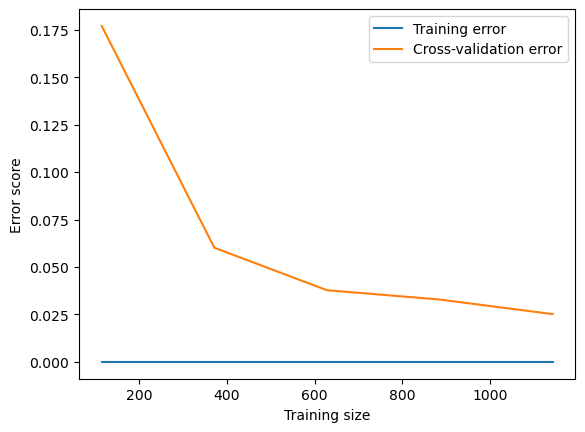

In [21]:
final_model = Pipeline([
    ('final_model', grid_search.best_estimator_),
])

train_size, train_acc, valid_acc = learning_curve(final_model, X=train_x, y=train_y, cv=5)

plt.figure()
plt.plot(train_size, 1-train_acc.mean(axis=1), label='Training error')
plt.plot(train_size, 1-valid_acc.mean(axis=1), label='Cross-validation error')
plt.xlabel('Training size')
plt.ylabel('Error score')
plt.legend()
plt.show()

More training data is required to significantly improve the performance of the model.

## Final model Training

Training the best RandomForestClassifier as the final model

In [22]:
# final model: Random forest classifier
final_model = Pipeline([
    ('final_model', grid_search.best_estimator_),
])
final_model.fit(X=train_x, y=train_y)
sio.dump(final_model, './resources/models/final_model.joblib')
train_y_pred = final_model.predict(X=train_x)

print(train_accuracy(train_y, train_y_pred))
print(cv_accuracy(forest_clf, train_x, train_y))

{'Training Accuracy': 1.0}
{'CV accuracies': array([0.98601399, 0.95454545, 0.97552448, 0.96503497, 0.97192982]), 'Mean': 0.970609741136057, 'Standard deviation': 0.010510256199161811}


Obtaining feature importances

In [23]:
feature_importances = final_model.named_steps['final_model'].feature_importances_
pd.Series(data=feature_importances, index=mnist_digits['feature_names']).sort_values(ascending=False)

pixel_2_5    0.051487
pixel_3_2    0.041323
pixel_5_3    0.040937
pixel_4_4    0.039127
pixel_3_4    0.033400
               ...   
pixel_0_0    0.000000
pixel_7_0    0.000000
pixel_4_7    0.000000
pixel_3_0    0.000000
pixel_4_0    0.000000
Length: 64, dtype: float64

## Final Model Test

Evaluating the perfomance of the final model on the test set

In [24]:
# Test set prediction
test_predictions = final_model.predict(test_x)

# Evaluate model
accuracy = accuracy_score(test_y, test_predictions)
print('accuracy: ', accuracy)

precision = precision_score(test_y, test_predictions, average='micro')
print('precision: ', precision)

recall = recall_score(test_y, test_predictions, average='micro')
print('recall: ', recall)

f1 = f1_score(test_y, test_predictions, average='micro')
print('f1: ', f1)

confusion = confusion_matrix(test_y, test_predictions)
print('confusion: ', confusion)

accuracy:  0.9748603351955307
precision:  0.9748603351955307
recall:  0.9748603351955307
f1:  0.9748603351955307
confusion:  [[34  0  0  0  1  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 35  0  0  0  1  1  0]
 [ 0  0  0  0 34  0  0  1  0  1]
 [ 0  0  0  0  0 35  0  0  1  0]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  2  0  0  0  0  0  0 33  0]
 [ 0  0  0  0  0  1  0  0  0 35]]


There are some misclassificarion involving
1. 0 classified as 4 (1)
2. 3 classified as 7 (1) 
3. 3 classified as 8 (2)
4. 4 classified as 7 (1)
5. 8 classified as 1 (2)
6. 9 classified as 5 (1)

## Prediction

Predicting some digits

In [25]:
# Read prediction data
digits_x = mnist_digits['data'][:10, :]

# Predict median house value
predictions = final_model.predict(digits_x)
print('prediction: ', predictions)

prediction:  [0 1 2 3 4 9 6 7 8 9]


The model gets all but one digits out of 10: a 5 classified as a 9.

What image did the model misclassify?

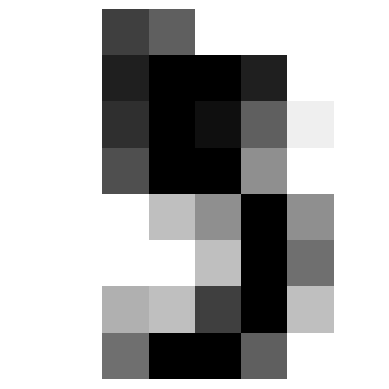

In [26]:
plt.imshow(digits_x[5].reshape(8, 8), cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()